<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Describe-data" data-toc-modified-id="Describe-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Describe data</a></span><ul class="toc-item"><li><span><a href="#Sample-size" data-toc-modified-id="Sample-size-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Sample size</a></span></li><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#Shapiro-Wilk-Test" data-toc-modified-id="Shapiro-Wilk-Test-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Shapiro-Wilk Test</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Histograms</a></span></li></ul></li><li><span><a href="#Kendall's-Tau-correlation" data-toc-modified-id="Kendall's-Tau-correlation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Kendall's Tau correlation</a></span></li><li><span><a href="#Correlation-Heatmap" data-toc-modified-id="Correlation-Heatmap-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Correlation Heatmap</a></span></li></ul></li><li><span><a href="#Regression-model" data-toc-modified-id="Regression-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Regression model</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import kendalltau
from sklearn import linear_model

In [2]:
df = pd.read_csv('data/cleaned_data_gca.csv')

# Exploratory data analysis

## Describe data

In [3]:
df.head()

,age,education level,gender,income,reference persons,injunctive norm,descriptive norm,perceived consumer effectiveness,social desireability,environmental attitudes,technosalvation,personal affectedness,voluntary simplicity,perceived behavioral control,personal norms,connectedness to nature,guilt,intention to change behavior,self-reported PEB,assessed PEB
0,30.0,Hochschulabschluss,Männlich,4.0,4.0,6.0,3.0,7.0,3.0,5.0,7.0,6.0,4.0,3.0,7.0,4.0,5.0,7.0,6.0,0.0
1,34.0,Hochschulabschluss,Männlich,6.0,2.0,5.0,2.0,3.0,3.0,6.0,6.0,7.0,5.5,5.0,7.0,6.0,6.0,6.5,5.5,1.0
2,24.0,Abitur,Männlich,3.0,2.0,4.0,1.0,7.0,1.0,2.5,1.0,5.0,6.5,3.0,7.0,2.0,6.0,7.0,2.5,0.0
3,29.0,Hochschulabschluss,Männlich,5.0,2.0,6.0,4.0,2.0,2.0,6.5,7.0,4.0,4.5,6.0,6.0,6.0,5.0,6.0,3.0,0.0
4,23.0,Abitur,Männlich,1.0,2.0,2.0,3.0,7.0,3.0,4.0,4.0,3.0,5.5,5.0,7.0,7.0,6.0,6.5,5.5,2.0


### Sample size

In [4]:
print('Sample size socio-demographics =', df[df.columns[0]].count())
print('Sample size psychological variables =', df[df.columns[4]].count())

Sample size socio-demographics = 27
Sample size psychological variables = 28


### Descriptive statistics

**Descriptive statistics for numeric data**

In [5]:
descriptive_stat = df.describe()
descriptive_stat = descriptive_stat.T
descriptive_stat['skew'] = df.skew()
descriptive_stat['kurtosis'] = df.kurt()
descriptive_stat.insert(loc=5, column='median', value=df.median())

descriptive_stat=descriptive_stat.apply(pd.to_numeric, errors='ignore')

In [6]:
descriptive_stat.round(decimals=2)

,count,mean,std,min,25%,median,50%,75%,max,skew,kurtosis
age,27.0,26.11,10.58,14.0,19.00,24.0,24.0,30.00,67.0,2.29,7.87
income,27.0,3.93,1.80,1.0,3.00,5.0,5.0,5.00,7.0,-0.48,-0.86
reference persons,28.0,2.93,1.02,1.0,2.00,3.0,3.0,3.25,5.0,0.15,-0.05
injunctive norm,28.0,4.07,1.76,1.0,2.75,4.0,4.0,5.25,7.0,-0.12,-1.00
descriptive norm,28.0,2.36,1.10,1.0,2.00,2.0,2.0,3.00,5.0,0.67,-0.18
perceived consumer effectiveness,28.0,5.46,1.60,2.0,4.75,6.0,6.0,7.00,7.0,-0.66,-0.79
social desireability,28.0,3.61,1.50,1.0,3.00,3.5,3.5,5.00,6.0,-0.12,-0.79
environmental attitudes,28.0,6.16,1.02,2.5,6.00,6.5,6.5,7.00,7.0,-2.11,5.58
technosalvation,28.0,4.93,1.70,1.0,4.00,5.0,5.0,6.00,7.0,-1.05,0.59
personal affectedness,28.0,5.14,1.65,2.0,4.00,5.5,5.5,7.00,7.0,-0.41,-1.07


**Descriptive statistics for categorical data**

In [7]:
for col in list(df[['gender','education level']]):
  print('variable:', col)
  print(df[col].value_counts(dropna=False).to_string())
  print('')

variable: gender
Männlich    16
Weiblich    11
NaN          1

variable: education level
Hochschulabschluss          14
Abitur                       6
derzeit noch Schüler\*in     4
derzeit noch Schüler/*in     3
NaN                          1



### Shapiro-Wilk Test

In [8]:
# define Shapiro Wilk Test function
def shapiro_test(data):
    '''calculate K-S Test for and out  results in table'''    
    data = data._get_numeric_data()
    data_shapiro_test = pd.DataFrame()
    
    # Iterate over columns, calculate test statistic & create table
    for column in data: 
        column_shapiro_test = scipy.stats.shapiro(data[column])
        shapiro_pvalue_column = column_shapiro_test.pvalue
        if column_shapiro_test.pvalue < .05:
            shapiro_pvalue_column = '{:.5f}'.format(shapiro_pvalue_column) + '*'
            column_distr = 'non-normal'
        else:
            column_distr = 'normal'
        new_row = {'variable': column, 
                   'Shapiro Wilk p-value': shapiro_pvalue_column, 
                   'Shapiro Wilk statistic': column_shapiro_test.statistic,
                   'distribution': column_distr
                  }
        data_shapiro_test = data_shapiro_test.append(new_row, ignore_index=True)
        data_shapiro_test = data_shapiro_test[['variable', 'Shapiro Wilk statistic', 'Shapiro Wilk p-value', 'distribution']]
    return data_shapiro_test

In [9]:
shapiro_test(df)

,variable,Shapiro Wilk statistic,Shapiro Wilk p-value,distribution
0,age,NaN,1,normal
1,income,NaN,1,normal
2,reference persons,0.913787,0.02442*,non-normal
3,injunctive norm,0.942269,0.126247,normal
4,descriptive norm,0.878198,0.00367*,non-normal
5,perceived consumer effectiveness,0.846514,0.00080*,non-normal
6,social desireability,0.933485,0.0755096,normal
7,environmental attitudes,0.763013,0.00003*,non-normal
8,technosalvation,0.865829,0.00198*,non-normal
9,personal affectedness,0.887009,0.00575*,non-normal


### Histograms

**Histograms: Likert-scale variables**

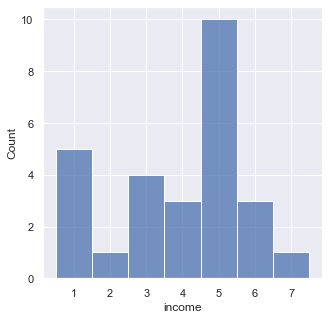

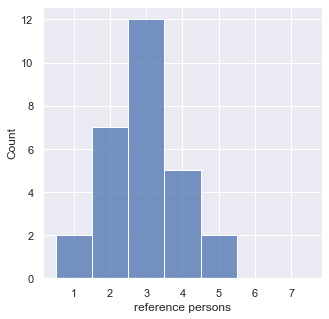

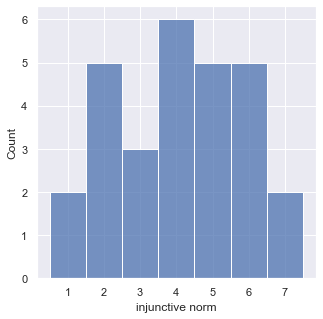

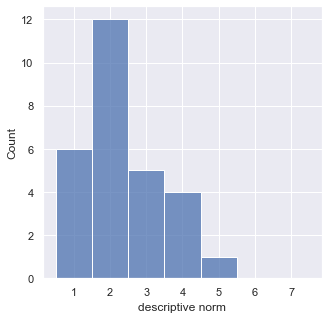

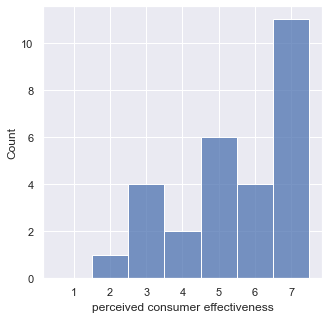

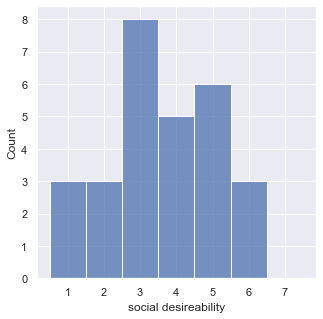

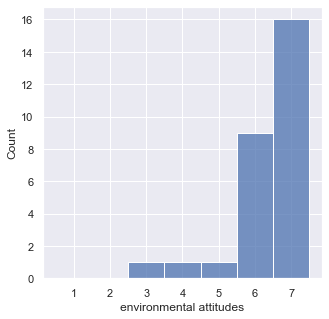

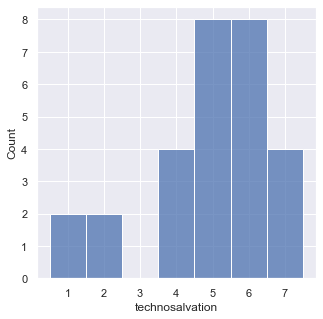

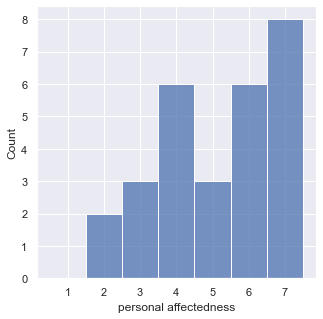

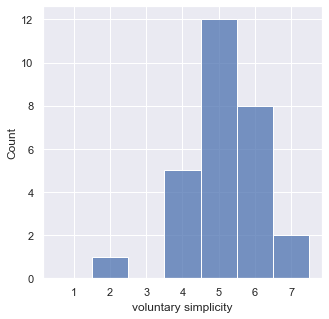

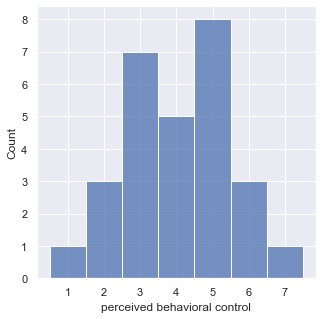

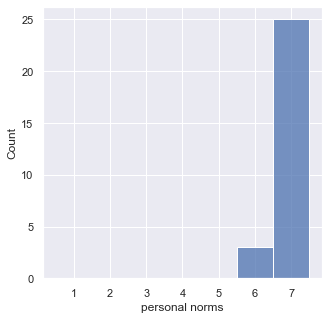

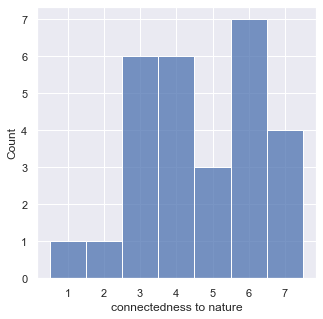

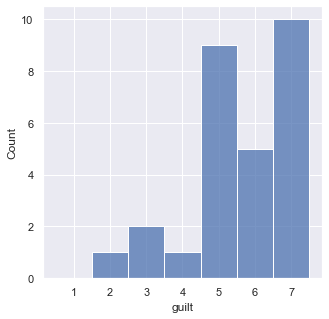

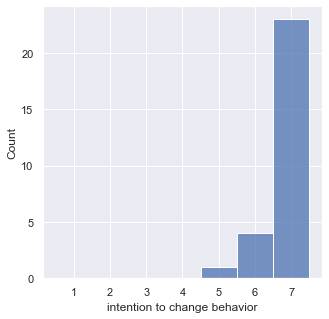

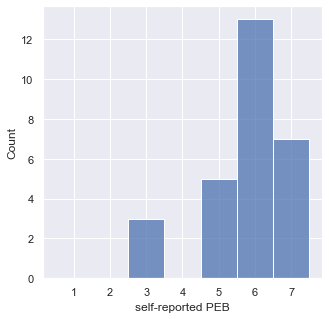

In [10]:
for column in df._get_numeric_data().drop(columns=['assessed PEB','age']):
    sns.set(rc={'figure.figsize':(5,5)})
    data = df[column]
    sns.histplot(data, bins=np.arange(1,9)-.5) 
    plt.xlabel(column)
    plt.show()

**Histogramm: age**

<AxesSubplot:xlabel='age', ylabel='Count'>

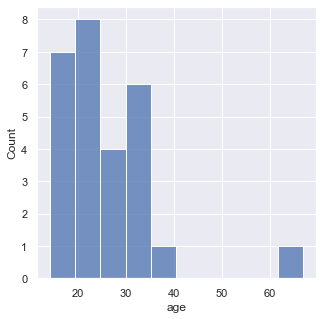

In [11]:
sns.histplot(df['age'], bins=10)

**Histogramm: assessed PEB**

<AxesSubplot:xlabel='assessed PEB', ylabel='Count'>

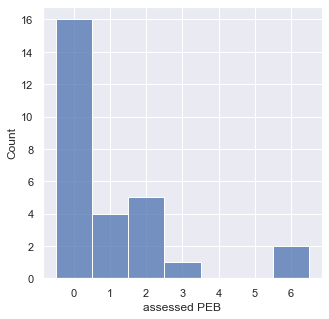

In [12]:
sns.histplot(df['assessed PEB'], bins=np.arange(0,8)-.5)

## Kendall's Tau correlation

In [13]:
# create df with correlation coefficient and p-value indication
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

# calculate kendall's tau correlation with p values ( < .01 = ***, < .05 = **, < .1 = *)
tau = df.corr(method = 'kendall').round(decimals=2)

pval = df.corr(method=kendall_pval) - np.eye(*tau.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05] if x<=t]))
tau_corr_with_p_values = tau.round(4).astype(str) + p

In [14]:
# set colored highlights for correlation matrix
def color_sig_blue(val):
    """
    color all significant values in blue
    """
    color = 'blue' if val.endswith('*') else 'black'
    return 'color: %s' % color

In [15]:
tau_corr_with_p_values.style.applymap(color_sig_blue)

,age,income,reference persons,injunctive norm,descriptive norm,perceived consumer effectiveness,social desireability,environmental attitudes,technosalvation,personal affectedness,voluntary simplicity,perceived behavioral control,personal norms,connectedness to nature,guilt,intention to change behavior,self-reported PEB,assessed PEB
age,1.0**,0.21,-0.12,0.08,0.18,-0.36*,-0.15,-0.11,0.16,-0.22,0.1,-0.02,-0.26,-0.11,-0.2,0.0,0.06,-0.32*
income,0.21,1.0**,0.05,0.16,0.1,-0.41**,-0.22,0.02,0.27,0.01,-0.11,0.14,-0.26,-0.12,-0.04,-0.16,-0.1,-0.16
reference persons,-0.12,0.05,1.0**,0.01,-0.23,0.12,0.48**,-0.25,0.14,-0.1,-0.39*,-0.35*,-0.08,-0.4*,-0.27,-0.27,-0.07,-0.07
injunctive norm,0.08,0.16,0.01,1.0**,0.31*,-0.24,-0.14,-0.15,0.18,0.04,0.02,-0.12,-0.23,-0.18,-0.26,-0.15,-0.02,-0.15
descriptive norm,0.18,0.1,-0.23,0.31*,1.0**,-0.07,-0.3,0.01,0.33*,0.09,0.13,0.34*,-0.21,0.14,-0.1,-0.11,0.13,-0.2
perceived consumer effectiveness,-0.36*,-0.41**,0.12,-0.24,-0.07,1.0**,0.02,-0.1,-0.25,0.22,0.05,0.15,0.22,0.08,0.2,0.31,0.05,0.24
social desireability,-0.15,-0.22,0.48**,-0.14,-0.3,0.02,1.0**,-0.02,-0.04,-0.09,-0.17,-0.17,-0.07,-0.08,-0.24,-0.19,-0.19,0.17
environmental attitudes,-0.11,0.02,-0.25,-0.15,0.01,-0.1,-0.02,1.0**,-0.02,0.01,-0.12,0.1,0.17,0.09,0.21,0.28,0.24,0.2
technosalvation,0.16,0.27,0.14,0.18,0.33*,-0.25,-0.04,-0.02,1.0**,-0.01,-0.23,0.19,-0.03,0.1,-0.25,-0.1,0.05,0.01
personal affectedness,-0.22,0.01,-0.1,0.04,0.09,0.22,-0.09,0.01,-0.01,1.0**,0.03,0.13,0.12,0.15,0.28,0.14,0.15,0.05


## Correlation Heatmap

All not significant correlations (p < .05) are not shown.

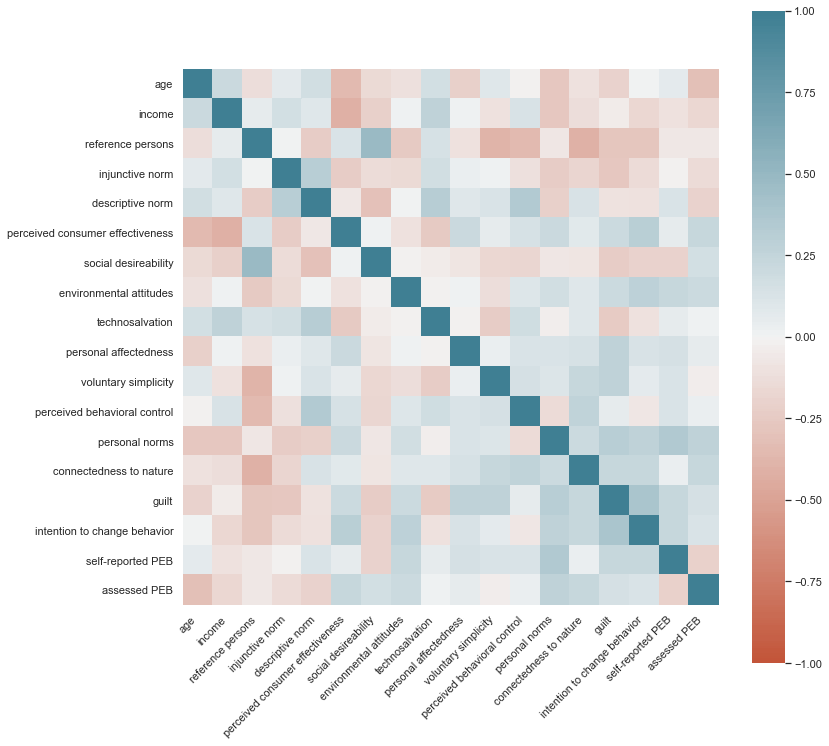

In [16]:
# calculate correlation coefficient
corr = df.corr(method='kendall')

# calculate column correlations and make a seaborn heatmap
sns.set(rc={'figure.figsize':(12,12)})

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
heatmap = ax.get_figure()

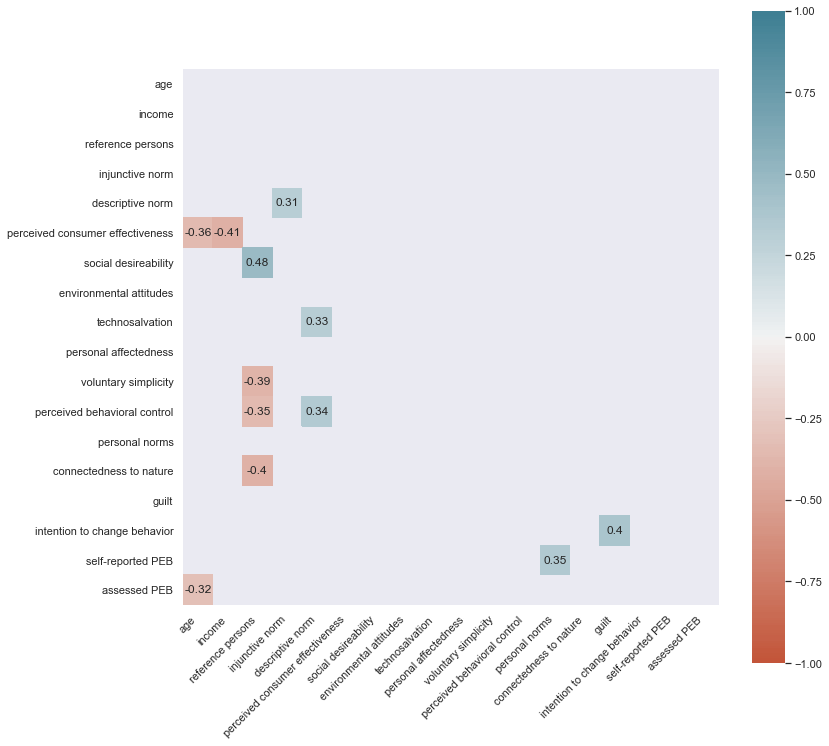

In [17]:
# calculate correlation coefficient and p-values
corr_p_values = df.corr(method = kendall_pval)
corr = df.corr(method='kendall')

# calculate column correlations and make a seaborn heatmap
sns.set(rc={'figure.figsize':(12,12)})

#set mask for only significant values (p < .05)
mask = np.invert(np.tril(corr_p_values<.05))

ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True,
    mask=mask
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
heatmap = ax.get_figure()

# Regression model

Build least Angle regression model

In [18]:
data = df.dropna()

# Lasso regression https://scikit-learn.org/dev/modules/linear_model.html#lars-lasso
reg = linear_model.LassoLars(alpha=.05)

X = data.drop(columns=['assessed PEB','gender','education level'])
y = data['assessed PEB']

reg.fit(X,y)
lasso_reg = reg.coef_

In [19]:
lasso_reg

array([ 0.        ,  0.        ,  0.0235379 , -0.13012194, -0.01567977,
        0.08453434,  0.        ,  0.19275408,  0.        , -0.02068782,
        0.        ,  0.        ,  0.24661897,  0.        ,  0.        ,
        0.        , -0.28105271])

Show coefficients for each selected variable

In [20]:
i = 0
for e in lasso_reg:
    e = e.round(decimals=4)
    if e != 0:
        print(data.columns[i] + ':', str(e))
    i +=1

gender: 0.0235
income: -0.1301
reference persons: -0.0157
injunctive norm: 0.0845
perceived consumer effectiveness: 0.1928
environmental attitudes: -0.0207
voluntary simplicity: 0.2466
guilt: -0.2811
